# Red Wine Quality Multiclass Classification
Name: Lina Al Waqfi
#####Student Number: 501279460
##Introduction:
In this project, PyCaret open-source library will be used to perform the classification for red wine quality. Data has been taked from UCI Machine Learning Repository and the link to the source file will be found in the references.
The main challenges in the data processing:
1. Data is not balanced and most of the values are in the 5-7 ranges.
2. Determining the optimal number of categories/bins

The follwing libraries have been used in the model:
1. Pandas
2. Numpy
3. PyCaret
4. Seaborn
5. Matplotlib


The workflow in this project will based on the main workflow for PyCaret as follow:
1. Setup
2. Compare Models
3. Analyze Models
4. Prediction
5. Save Model

#####However some additional steps that involve pre-processing the data and importing libraries will be intergrated within the workflow


## 1. Installating and Importing Libraries

In [ ]:
!pip install pycaret[full]

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Importing Data and Overview

2.1 The data has been imported from the source link, unzipped, and a delimeter ";" has been identified as the seperator to covert it to a tabular format. The tables below show the feature columns along with more details on the values of the target column "Quality". The next steps are to check for missing values and duplicates. Quality has been changed to category and checked for data imbalance

In [ ]:
#import the data set directly from the source file
!wget -q https://archive.ics.uci.edu/static/public/186/wine+quality.zip -O wine.zip
!unzip -q wine.zip

In [ ]:
data = pd.read_csv('winequality-red.csv' , delimiter=";")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
data.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

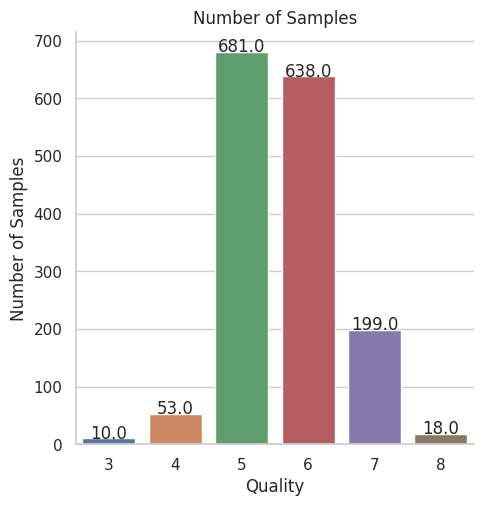

In [ ]:
# Catplot visualization to demonstrate the count
sns.set(style="whitegrid")
g = sns.catplot(x='quality', data=data, kind='count', palette='deep')

ax = g.ax
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.title("Number of Samples")
plt.xlabel("Quality")
plt.ylabel("Number of Samples")

# Show the plot
plt.show()


In [ ]:
data.shape

(1599, 12)

##### There is one element in the DataFrame for each row, and the DataFrame is not empty as shown below

In [ ]:
len(data) == data.shape[0]

True

In [ ]:
data.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


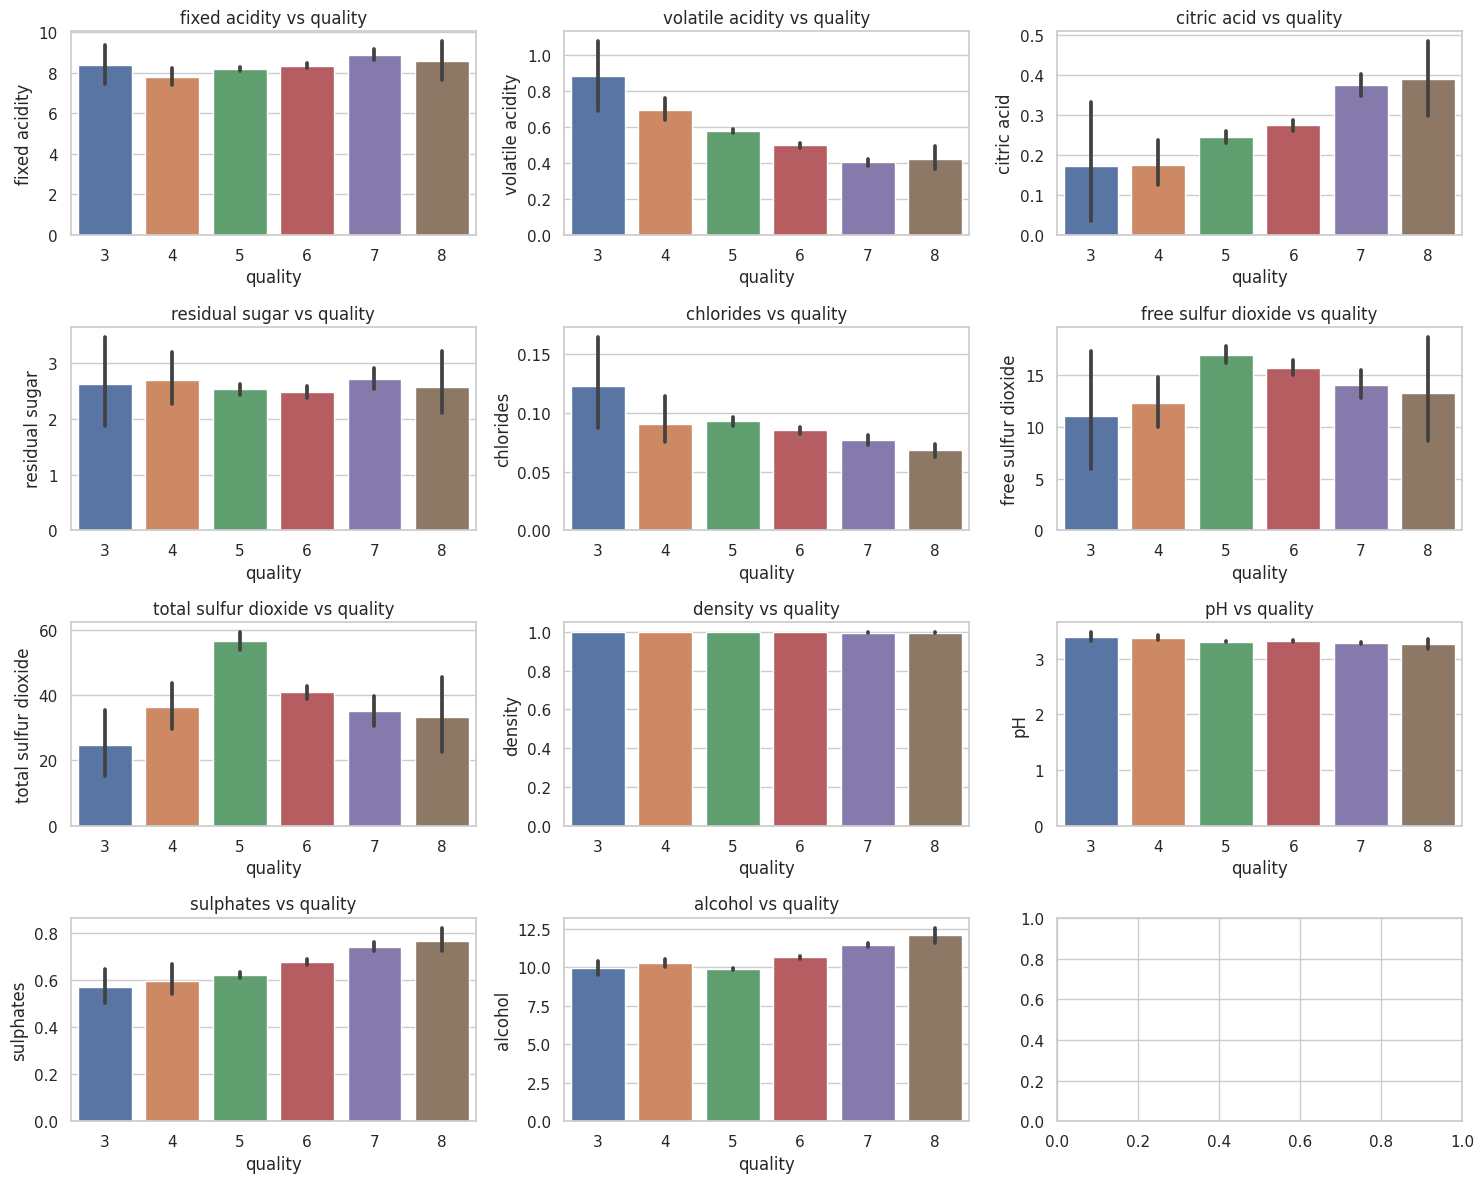

In [ ]:
# The features to visualize
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
            'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
            'pH', 'sulphates', 'alcohol']

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))
axes = axes.ravel()

for i, feature in enumerate(features):
    sns.barplot(x='quality', y=feature, data=data, ax=axes[i])
    axes[i].set_xlabel('quality')
    axes[i].set_ylabel(feature)
    axes[i].set_title(f'{feature} vs quality')

plt.tight_layout()

plt.show()

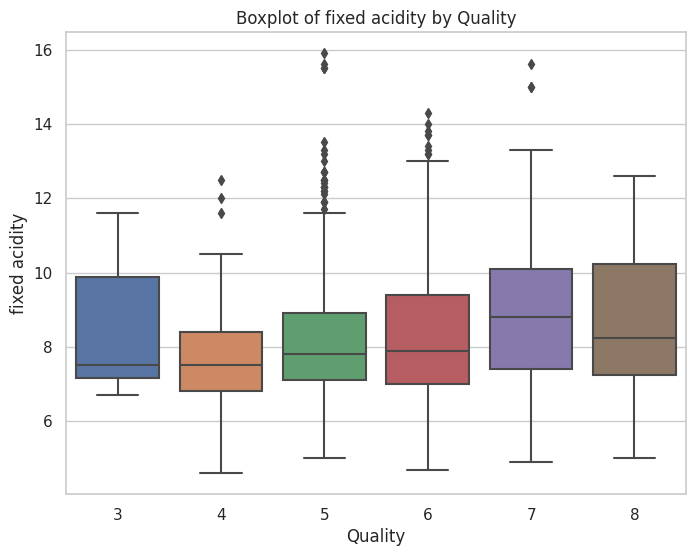

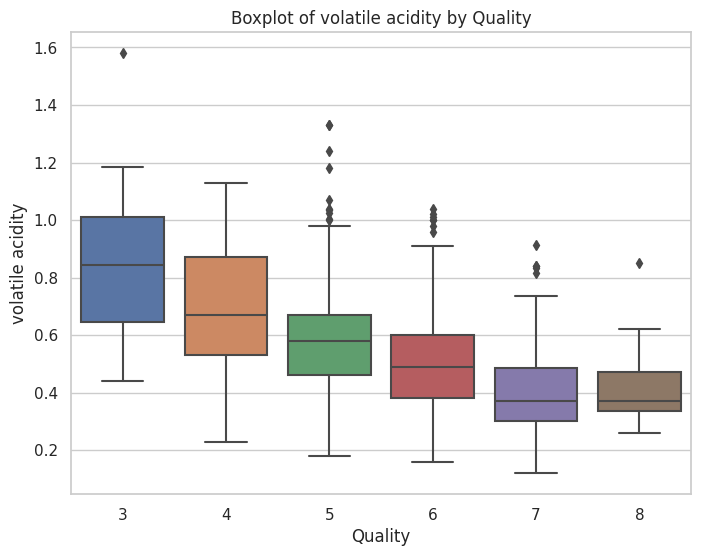

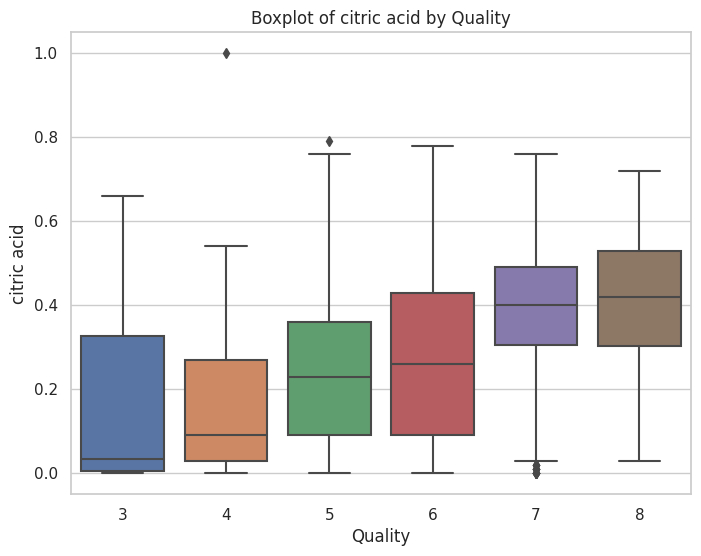

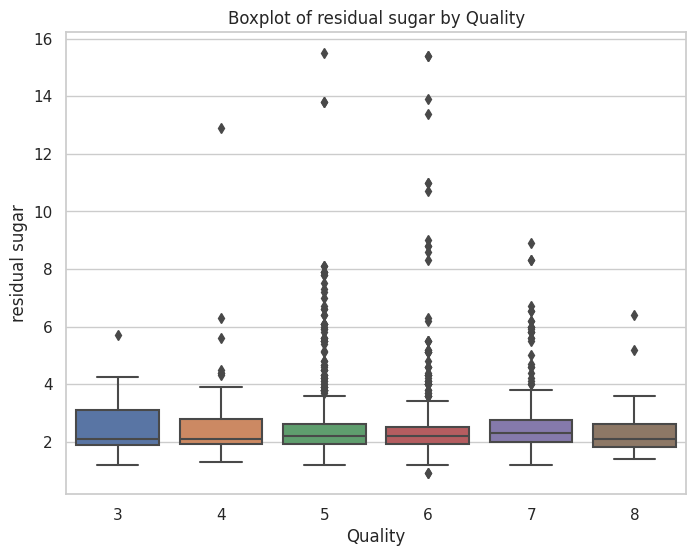

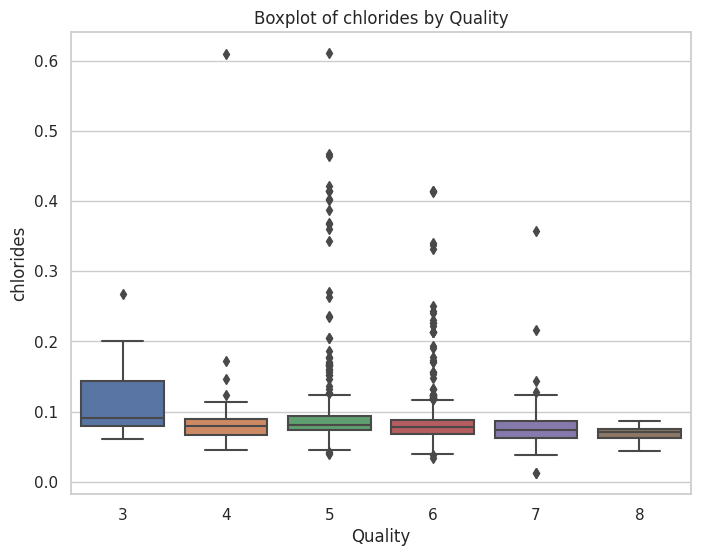

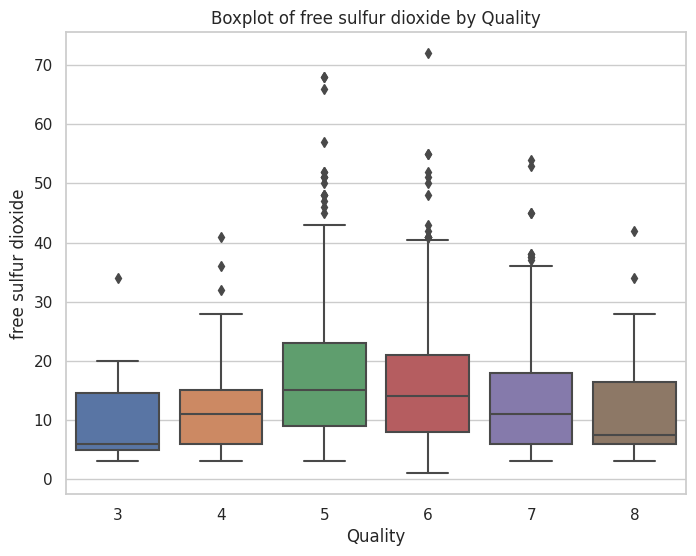

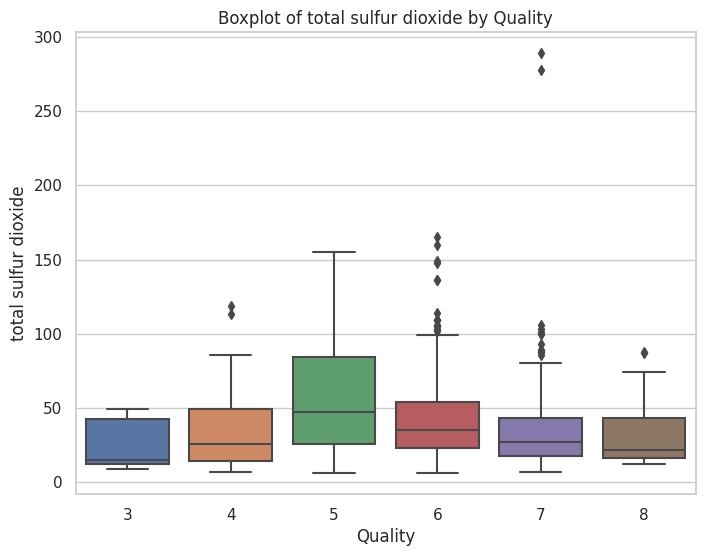

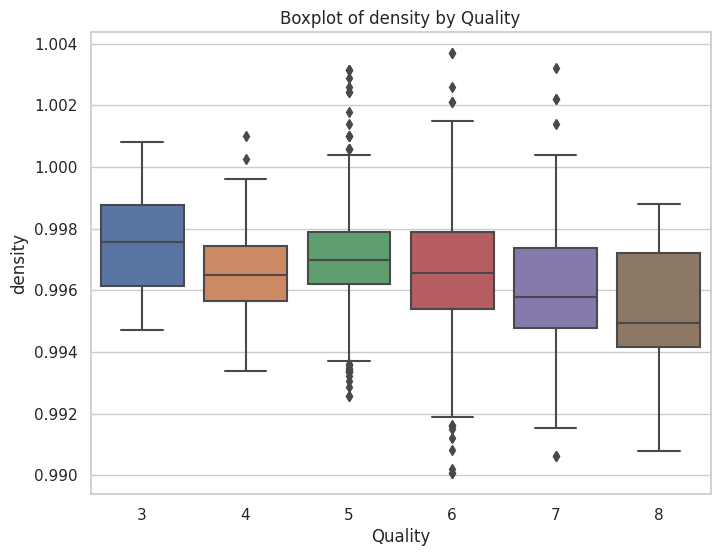

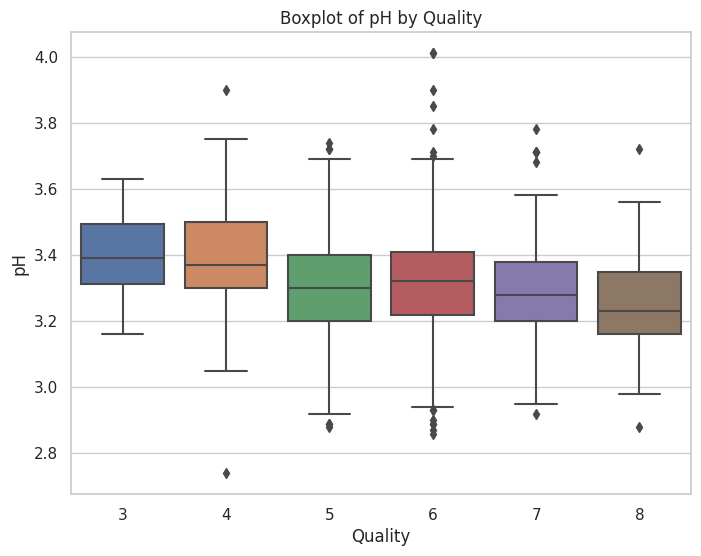

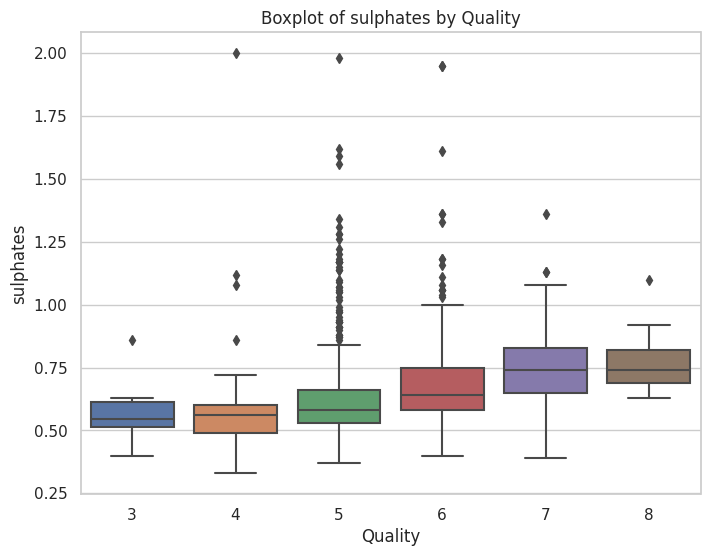

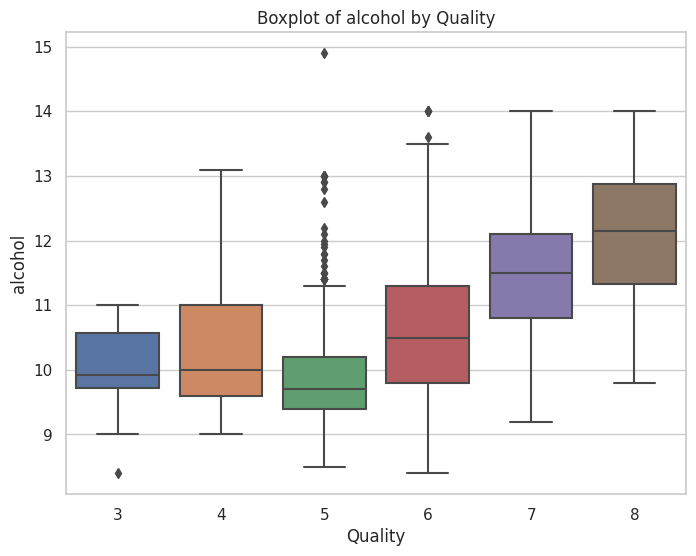

In [ ]:
 # The below graph shows boxplot grouped by 'quality'
    for label in data.columns[:-1]:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='quality', y=label, data=data)
    plt.title(f'Boxplot of {label} by Quality')
    plt.xlabel('Quality')
    plt.ylabel(label)
    plt.show()


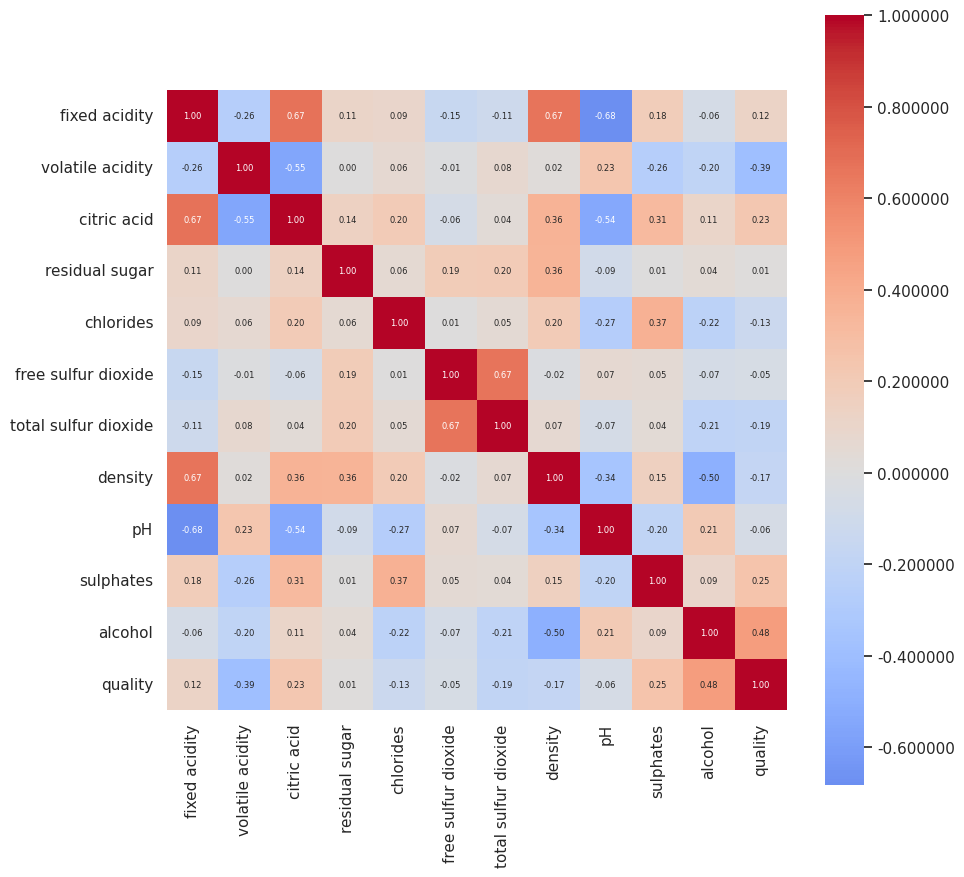

In [ ]:
# The correlation matrix
correlation = data.corr()

# Set the colormap to 'coolwarm'
cmap = 'coolwarm'

# Create the heatmap with the adjusted colormap and centered color scale
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size': 6}, cmap=cmap, center=0, cbar_kws={'format': '%1f'})
plt.show()



In [ ]:
# Check for missing values- as we can see below, there are no missing values in the dataset
missing_values = data.isnull().sum()
print(missing_values)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [ ]:
# Convert quality to category type
data['quality'] = data['quality'].astype('category')


# 3. PyCaret Setup
#####This function initializes the training environment and creates the transformation pipeline. The high imbalance in data has been fixed by oversampling the minority as the other two groups are almost equal in size and have no issues. The test dataset account for 22% of the overall dataset. Given the small size of the data, this % seems to be reasonable.

In [ ]:
print(data.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [ ]:
from imblearn.over_sampling import *
adasyn1 = ADASYN(sampling_strategy='minority')

In [ ]:
# import pycaret classification and init setup, the train size has chosedn to be 0.8 due to small data size
from pycaret.classification import *
s= setup(data, target = 'quality', session_id=177, log_experiment=False,
                  experiment_name='wine_q2', normalize=True, normalize_method='zscore',
                  transformation=True, transformation_method = 'quantile', fix_imbalance=True,
                  fix_imbalance_method= adasyn1)

,Description,Value
0,Session id,177
1,Target,quality
2,Target type,Multiclass
3,Target mapping,"3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5"
4,Original data shape,"(1599, 12)"
5,Transformed data shape,"(2068, 12)"
6,Transformed train set shape,"(1588, 12)"
7,Transformed test set shape,"(480, 12)"
8,Numeric features,11
9,Preprocess,True


In [ ]:
# check the type of exp
type(s)

pycaret.classification.oop.ClassificationExperiment

## 4. Compare Models

Compare models is a convenient way to quickly assess the performance of different models without manually training and evaluating each one

In [ ]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6542,0.5662,0.6542,0.6302,0.6386,0.4449,0.4484,6.1470
rf,Random Forest Classifier,0.6506,0.5713,0.6506,0.6325,0.6340,0.4327,0.4367,0.8860
et,Extra Trees Classifier,0.6506,0.5772,0.6506,0.6318,0.6330,0.4319,0.4366,0.3320
catboost,CatBoost Classifier,0.6435,0.5699,0.6435,0.6216,0.6285,0.4265,0.4296,18.3330
xgboost,Extreme Gradient Boosting,0.6399,0.5643,0.6399,0.6231,0.6283,0.4258,0.4283,0.5510
gbc,Gradient Boosting Classifier,0.6265,0.5439,0.6265,0.6160,0.6172,0.4044,0.4067,3.3360
qda,Quadratic Discriminant Analysis,0.5657,0.5062,0.5657,0.5566,0.5588,0.3209,0.3224,0.2010
lr,Logistic Regression,0.5595,0.5181,0.5595,0.5690,0.5555,0.3100,0.3148,1.1830
lda,Linear Discriminant Analysis,0.5550,0.5211,0.5550,0.5788,0.5616,0.3240,0.3279,0.1010
dt,Decision Tree Classifier,0.5451,0.4501,0.5451,0.5593,0.5493,0.3009,0.3027,0.1050


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [ ]:
# compare models using OOP
s.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6533,0.5680,0.6533,0.6268,0.6362,0.4418,0.4454,4.6420
et,Extra Trees Classifier,0.6497,0.5829,0.6497,0.6270,0.6305,0.4303,0.4352,0.6210
catboost,CatBoost Classifier,0.6470,0.5705,0.6470,0.6247,0.6322,0.4324,0.4352,18.5700
rf,Random Forest Classifier,0.6408,0.5724,0.6408,0.6239,0.6237,0.4170,0.4216,0.7060
xgboost,Extreme Gradient Boosting,0.6408,0.5662,0.6408,0.6270,0.6293,0.4257,0.4284,0.8470
gbc,Gradient Boosting Classifier,0.6337,0.5469,0.6337,0.6216,0.6245,0.4177,0.4201,2.9320
qda,Quadratic Discriminant Analysis,0.5666,0.5062,0.5666,0.5551,0.5585,0.3215,0.3230,0.0980
dt,Decision Tree Classifier,0.5639,0.4621,0.5639,0.5775,0.5684,0.3309,0.3325,0.1800
lr,Logistic Regression,0.5577,0.5187,0.5577,0.5693,0.5547,0.3085,0.3134,0.1390
lda,Linear Discriminant Analysis,0.5568,0.5213,0.5568,0.5797,0.5635,0.3272,0.3309,0.1110


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=177, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

Notice that the output between functional and OOP API is consistent. Rest of the functions in this notebook will only be shown using functional API only.

## 5. Running and Tunning the Models

Based on the comparison of different models, the following models will be selecetd for the analysis and will be tuned to find the hyperparameter values that make the model generalize well to new, unseen data
1. Light Gradient Boosting Machine
2. Extreme Gradient Boosting
3. Extra Trees Classifier

In [ ]:
#Light Gradient Boosting Machine
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6161,0.8011,0.6161,0.6059,0.6101,0.4034,0.4043
1,0.7232,0.8639,0.7232,0.6904,0.7037,0.5546,0.5584
2,0.6786,0.8164,0.6786,0.6437,0.6599,0.4797,0.4817
3,0.6161,0.7855,0.6161,0.6046,0.6068,0.3898,0.3927
4,0.5714,0.7663,0.5714,0.5215,0.5406,0.2961,0.3002
5,0.6607,0.7916,0.6607,0.6350,0.6427,0.4507,0.4545
6,0.6429,0.0000,0.6429,0.6183,0.6240,0.4242,0.4307
7,0.7232,0.0000,0.7232,0.6904,0.7060,0.5537,0.5553
8,0.6518,0.0000,0.6518,0.6429,0.6425,0.4400,0.4443


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_lightgbm = tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6518,0.8084,0.6518,0.6482,0.6464,0.4518,0.4556
1,0.6875,0.8283,0.6875,0.6588,0.6709,0.5019,0.5040
2,0.6429,0.8198,0.6429,0.6293,0.6357,0.4339,0.4344
3,0.6250,0.8001,0.6250,0.6117,0.6143,0.4009,0.4047
4,0.5804,0.7428,0.5804,0.5475,0.5607,0.3195,0.3219
5,0.6071,0.7838,0.6071,0.6224,0.6046,0.3712,0.3746
6,0.5893,0.0000,0.5893,0.5675,0.5711,0.3352,0.3414
7,0.6875,0.0000,0.6875,0.6685,0.6755,0.5030,0.5057
8,0.6339,0.0000,0.6339,0.6069,0.6163,0.4036,0.4082


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
#Random forest classifier
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6518,0.8130,0.6518,0.6269,0.6385,0.4507,0.4519
1,0.7232,0.8814,0.7232,0.7030,0.7076,0.5579,0.5623
2,0.6696,0.8265,0.6696,0.6486,0.6559,0.4671,0.4698
3,0.6161,0.7893,0.6161,0.6140,0.6036,0.3758,0.3807
4,0.6161,0.7949,0.6161,0.5787,0.5813,0.3651,0.3725
5,0.6518,0.7994,0.6518,0.6408,0.6322,0.4299,0.4353
6,0.6429,0.0000,0.6429,0.6160,0.6213,0.4194,0.4266
7,0.6518,0.0000,0.6518,0.6180,0.6312,0.4287,0.4320
8,0.6250,0.0000,0.6250,0.6261,0.6148,0.3881,0.3921


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# Tune the hyperparameters of the Random Forest model
tuned_random_forest_model = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5893,0.7933,0.5893,0.5949,0.5856,0.3817,0.3856
1,0.6696,0.8463,0.6696,0.6647,0.6633,0.4905,0.4924
2,0.6250,0.8164,0.6250,0.6421,0.6318,0.4274,0.4284
3,0.5536,0.7482,0.5536,0.5502,0.5515,0.3079,0.3082
4,0.5536,0.7684,0.5536,0.5473,0.5490,0.3066,0.3077
5,0.6339,0.7776,0.6339,0.6432,0.6376,0.4359,0.4374
6,0.5982,0.0000,0.5982,0.5954,0.5954,0.3801,0.3812
7,0.6250,0.0000,0.6250,0.6196,0.6218,0.4138,0.4141
8,0.6429,0.0000,0.6429,0.6352,0.6371,0.4365,0.4384


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
# Extra Trees Classifier
extra_trees_model = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6607,0.8276,0.6607,0.6399,0.6474,0.4572,0.4602
1,0.6696,0.8672,0.6696,0.6423,0.6531,0.4686,0.4709
2,0.6696,0.8353,0.6696,0.6323,0.6466,0.4584,0.4621
3,0.6071,0.8062,0.6071,0.6049,0.5949,0.3656,0.3711
4,0.5893,0.8043,0.5893,0.5472,0.5562,0.3228,0.3297
5,0.6696,0.8127,0.6696,0.6477,0.6507,0.4628,0.4677
6,0.6875,0.0000,0.6875,0.6682,0.6666,0.4922,0.5018
7,0.6607,0.0000,0.6607,0.6280,0.6414,0.4456,0.4487
8,0.6429,0.0000,0.6429,0.6369,0.6251,0.4110,0.4169


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# Tune the hyperparameters of the Extra Trees Classifier
tuned_et_model = tune_model(extra_trees_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5536,0.7483,0.5536,0.4748,0.5104,0.2610,0.2690
1,0.6339,0.7777,0.6339,0.5523,0.5855,0.4016,0.4148
2,0.6071,0.7667,0.6071,0.5403,0.5659,0.3578,0.3690
3,0.4821,0.6742,0.4821,0.4176,0.4475,0.1508,0.1548
4,0.5446,0.7437,0.5446,0.4625,0.4975,0.2522,0.2593
5,0.5536,0.7104,0.5536,0.4878,0.5182,0.2736,0.2806
6,0.5625,0.0000,0.5625,0.5070,0.5314,0.2942,0.3032
7,0.5446,0.0000,0.5446,0.4676,0.5031,0.2397,0.2463
8,0.5446,0.0000,0.5446,0.4683,0.4969,0.2457,0.2580


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

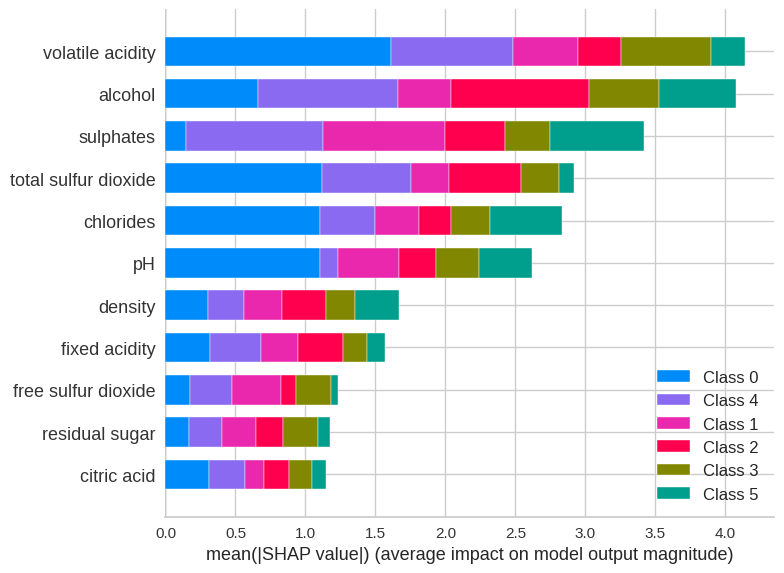

In [ ]:
# Interpret the model
interpret_model(best)

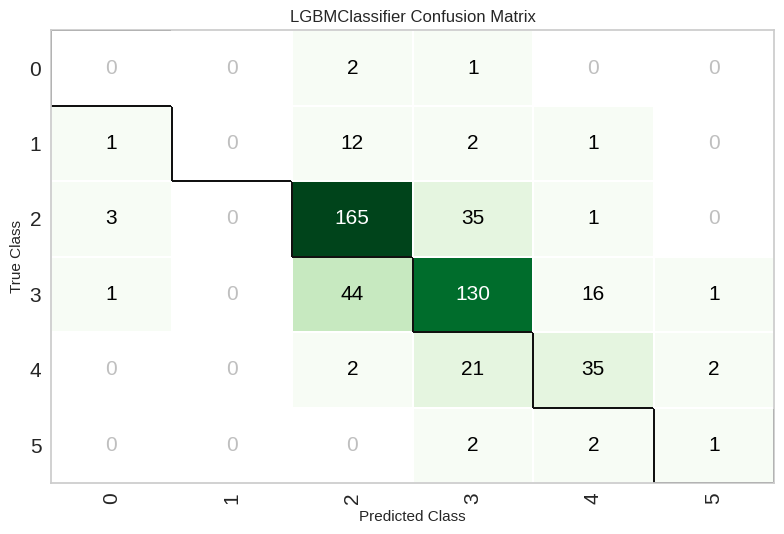

In [ ]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

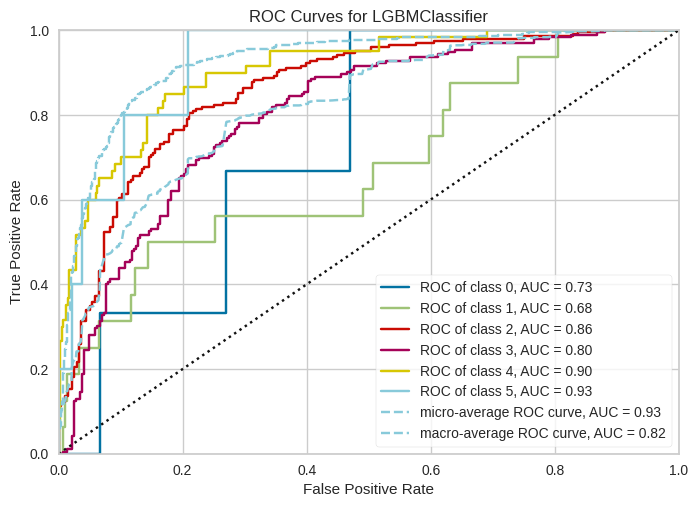

In [ ]:
# plot AUC
plot_model(best, plot = 'auc')

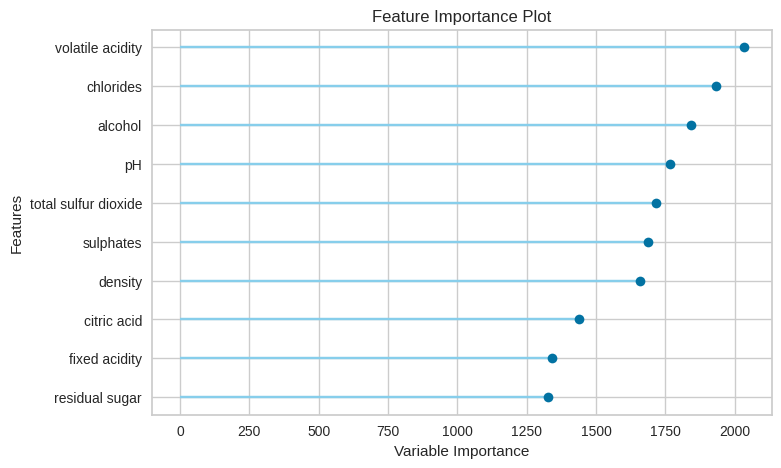

In [ ]:
# plot feature importance
plot_model(best, plot = 'feature')

In [ ]:
# check docstring to see available plots
help(plot_model)

Help on function plot_model in module pycaret.classification.functional:

plot_model(estimator, plot: str = 'auc', scale: float = 1, save: bool = False, fold: Union[int, Any, NoneType] = None, fit_kwargs: Optional[dict] = None, plot_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, verbose: bool = True, display_format: Optional[str] = None) -> Optional[str]
    This function analyzes the performance of a trained model on holdout set.
    It may require re-training the model in certain cases.
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> juice = get_data('juice')
    >>> from pycaret.classification import *
    >>> exp_name = setup(data = juice,  target = 'Purchase')
    >>> lr = create_model('lr')
    >>> plot_model(lr, plot = 'auc')
    
    
    estimator: scikit-learn compatible object
        Trained model object
    
    
    plot: str, default = 'auc'
        List of available plots (ID - Name):
    
        * 'pipeline'

In [ ]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Prediction
The `predict_model` function returns `prediction_label` and `prediction_score` (probability of the predicted class) as new columns in dataframe. When data is `None` (default), it uses the test set (created during the setup function) for scoring.

In [ ]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.6896,0.8374,0.6896,0.6661,0.6769,0.5050,0.5065


In [ ]:
# show predictions df
holdout_pred.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,prediction_label,prediction_score
21,7.6,0.39,0.31,2.3,0.082,23.0,71.0,0.99820,3.52,0.65,9.7,5,6,0.5253
1595,5.9,0.55,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,6,0.9875
833,11.6,0.47,0.44,1.6,0.147,36.0,51.0,0.99836,3.38,0.86,9.9,4,3,0.9143
887,10.7,0.52,0.38,2.6,0.066,29.0,56.0,0.99577,3.15,0.79,12.1,7,6,0.9787
640,9.9,0.54,0.45,2.3,0.071,16.0,40.0,0.99910,3.39,0.62,9.4,5,5,0.9802


The same function works for predicting the labels on unseen dataset. Let's create a copy of original data and drop the `Class variable`. We can then use the new data frame without labels for scoring.

In [ ]:
# copy data and drop Class variable

new_data = data.copy()
new_data.drop('quality', axis=1, inplace=True)
new_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [ ]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,prediction_label,prediction_score
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.9949
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0.9773
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0.5423
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0.9756
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.9949


## Save Model

Finally, you can save the entire pipeline on disk for later use, using pycaret's `save_model` function.

In [ ]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['fixed acidity',
                                              'volatile acidity', 'citric acid',
                                              'residual sugar', 'chlorides',
                                              'free sulfur dioxide',
                                              'total sulfur dioxide', 'density',
                                              'pH', 'sulphates...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 learning_rate=0.1, max_depth=-1,
                       

In [ ]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['fixed acidity',
                                             'volatile acidity', 'citric acid',
                                             'residual sugar', 'chlorides',
                                             'free sulfur dioxide',
                                             'total sulfur dioxide', 'density',
                                             'pH'...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_leaves=31, objective=None, random_state=177,
                                reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
                                subsample_for_bin=200000, subsample_freq=0))],
         verbose=False)

## Experiment Logging
PyCaret integrates with many different type of experiment loggers (default = 'mlflow'). To turn on experiment tracking in PyCaret you can set `log_experiment` and `experiment_name` parameter. It will automatically track all the metrics, hyperparameters, and artifacts based on the defined logger.

In [ ]:
# from pycaret.classification import *
# s= setup(data, target = 'quality_category', session_id=177, log_experiment=False, experiment_name='wine_q2', normalize=True, normalize_method='zscore', transformation=True, transformation_method = 'quantile', fix_imbalance=True, fix_imbalance_method= adasyn1)

In [ ]:
# compare models
# best = compare_models()

In [ ]:
# start mlflow server on localhost:5000
# !mlflow ui

In [ ]:
# help(setup)

## Create Model
This function trains and evaluates the performance of a given estimator using cross-validation. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function. All the available models can be accessed using the models function.

In [ ]:
# check all the available models
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [ ]:
rf_results = pull()
print(type(rf_results))
rf_results

<class 'pandas.core.frame.DataFrame'>


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6339,0.8066,0.6339,0.6117,0.6219,0.4248,0.4258
1,0.7143,0.8764,0.7143,0.6804,0.6922,0.5362,0.5405
2,0.6607,0.8334,0.6607,0.6323,0.6448,0.4517,0.4537
3,0.5982,0.7700,0.5982,0.5955,0.5884,0.3493,0.3529
4,0.6250,0.7805,0.6250,0.5863,0.5886,0.3793,0.3881
5,0.6518,0.7782,0.6518,0.6371,0.6383,0.4391,0.4432
6,0.6161,0.0000,0.6161,0.5893,0.5908,0.3703,0.3782
7,0.6786,0.0000,0.6786,0.6441,0.6556,0.4740,0.4804
8,0.6339,0.0000,0.6339,0.6290,0.6198,0.3987,0.4038


In [ ]:
# train Random Forest with fold=4
rf = create_model('rf', fold=4)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.6536,0.8101,0.6536,0.6212,0.6342,0.4348,0.4375
3,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Mean,0.1634,0.2025,0.1634,0.1553,0.1586,0.1087,0.1094
Std,0.2830,0.3508,0.2830,0.2690,0.2746,0.1883,0.1894


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# train rf and return train score
create_model('rf', return_train_score=True)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=177, verbose=0, warm_start=False)

In [ ]:
# help(create_model)

## Get Leaderboard

This function returns the leaderboard of all models trained in the current setup.

In [ ]:
# get leaderboard
lb = get_leaderboard()
lb

Processing:   0%|          | 0/45 [00:00<?, ?it/s]

,Model Name,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Index,,,,,,,,,
0,Logistic Regression,"(TransformerWrapperWithInverse(exclude=None, i...",0.5595,0.5181,0.5595,0.5690,0.5555,0.3100,0.3148
1,K Neighbors Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.5309,0.4902,0.5309,0.5286,0.5255,0.2600,0.2619
2,Naive Bayes,"(TransformerWrapperWithInverse(exclude=None, i...",0.5157,0.5122,0.5157,0.5615,0.5329,0.2862,0.2901
3,Decision Tree Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.5451,0.4501,0.5451,0.5593,0.5493,0.3009,0.3027
4,SVM - Linear Kernel,"(TransformerWrapperWithInverse(exclude=None, i...",0.4638,0.0000,0.4638,0.4827,0.4553,0.1823,0.1901
5,Ridge Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.5193,0.0000,0.5193,0.4896,0.5002,0.2452,0.2535
6,Random Forest Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.6506,0.5713,0.6506,0.6325,0.6340,0.4327,0.4367
7,Quadratic Discriminant Analysis,"(TransformerWrapperWithInverse(exclude=None, i...",0.5657,0.5062,0.5657,0.5566,0.5588,0.3209,0.3224
8,Ada Boost Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.4826,0.4124,0.4826,0.4549,0.4541,0.1821,0.1913
